## XgBoost before feature selection

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the cleaned dataset
data = pd.read_csv('cleaned_airline_data.csv')

In [ ]:
# Convert categorical columns to numeric using one-hot encoding or label encoding
categorical_columns = ['city1', 'city2', 'airport_1', 'airport_2', 'carrier_lg', 'carrier_low', 'Geocoded_City1', 'Geocoded_City2']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [ ]:
# Define all features (excluding the target variable)
X = data.drop(columns=['fare'])  # 'fare' is assumed to be the target variable
y = data['fare']

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define and train the XGBoost model
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predictions
y_train_pred = xgboost_model.predict(X_train)
y_test_pred = xgboost_model.predict(X_test)

In [ ]:
# Evaluate Model Performance
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
print(f"Train R²: {train_r2}, Test R²: {test_r2}")

Train RMSE: 10.981835359315978, Test RMSE: 12.78218553856021
Train R²: 0.971968113367482, Test R²: 0.9617098021879704


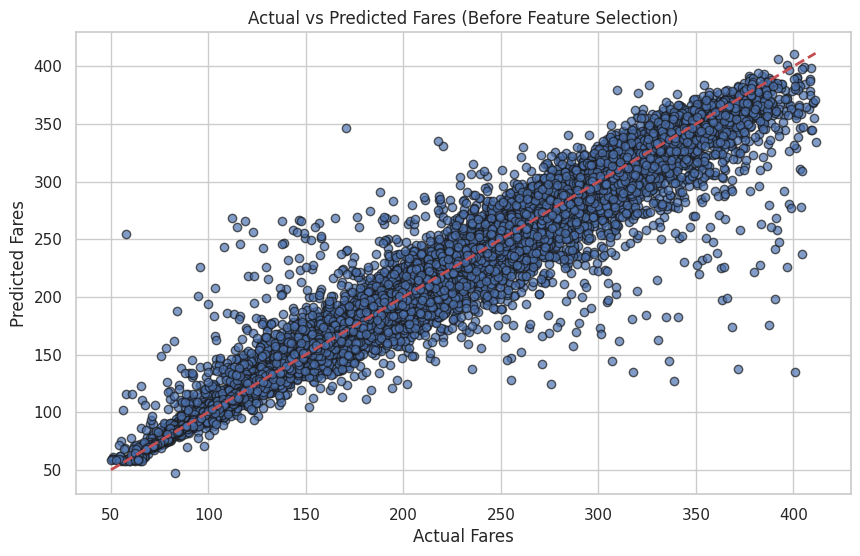

In [ ]:
# Visualizations

# 1. Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Actual vs Predicted Fares (Before Feature Selection)')
plt.xlabel('Actual Fares')
plt.ylabel('Predicted Fares')
plt.grid(True)
plt.show()

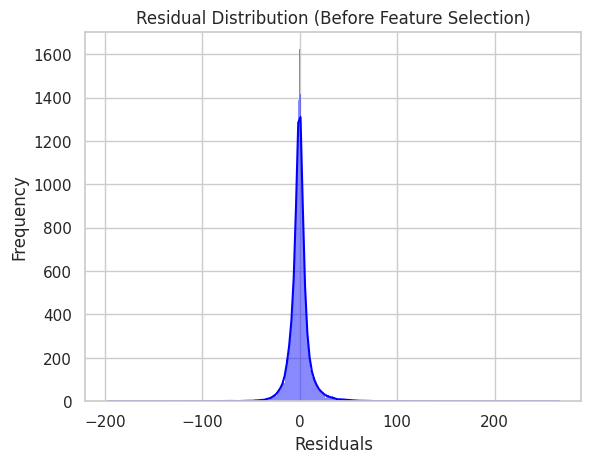

In [ ]:
# 2. Residual Analysis
residuals = y_test - y_test_pred
sns.histplot(residuals, kde=True, color='blue')
plt.title('Residual Distribution (Before Feature Selection)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## XgBoost Model after Feature Selection

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the cleaned dataset
data = pd.read_csv('cleaned_airline_data.csv')

In [ ]:
# Feature Selection
selected_features = ['Year', 'nsmiles', 'passengers', 'large_ms', 'fare_lg', 'lf_ms', 'fare_low']  # Customize as needed
target_variable = 'fare'

In [ ]:
X = data[selected_features]  # Feature matrix
y = data[target_variable]    # Target variable

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the XGBoost model
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [ ]:
# Define parameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
}

In [ ]:
# Perform Grid Search for Hyperparameter Tuning
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
# Best Model
best_xgboost_model = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)

Best parameters found: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


In [ ]:
# Train the best model on training data
best_xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Predictions
y_train_pred = best_xgboost_model.predict(X_train)
y_test_pred = best_xgboost_model.predict(X_test)

In [ ]:
# Evaluate Model Performance
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
print(f"Train R²: {train_r2}, Test R²: {test_r2}")

Train RMSE: 10.962042359035607, Test RMSE: 12.935365110119253
Train R²: 0.9720690682845934, Test R²: 0.9607865766063428


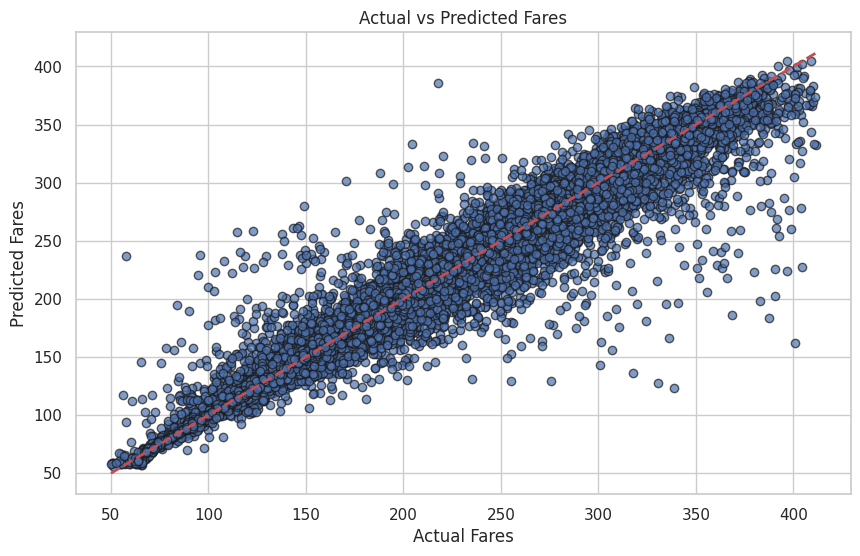

In [ ]:
# Visualizations

# 1. Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Actual vs Predicted Fares')
plt.xlabel('Actual Fares')
plt.ylabel('Predicted Fares')
plt.grid(True)
plt.show()

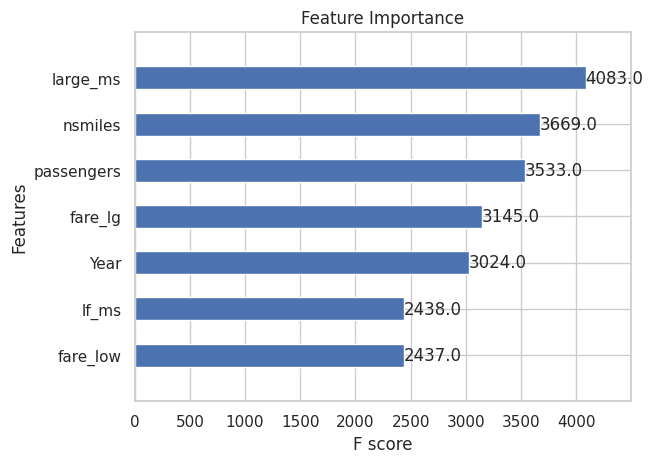

In [ ]:
# 2. Feature Importance
xgb.plot_importance(best_xgboost_model, importance_type='weight', max_num_features=10, height=0.5)
plt.title('Feature Importance')
plt.show()

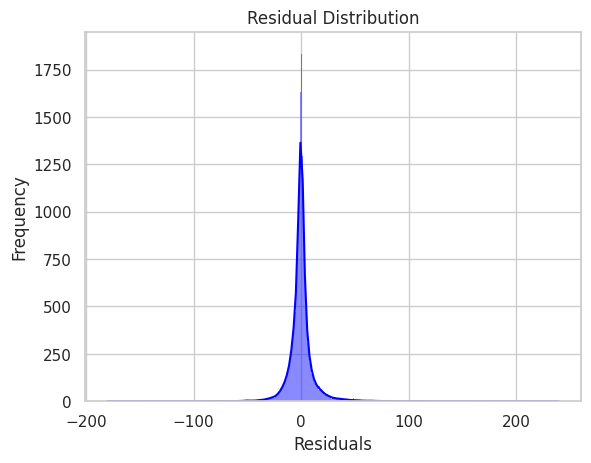

In [ ]:
# 3. Residual Analysis
residuals = y_test - y_test_pred
sns.histplot(residuals, kde=True, color='blue')
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Ensemble model

Train RMSE: 16.117972300626036, Test RMSE: 15.860300147160892
Train R²: 0.9377984826149849, Test R²: 0.9403754674806191


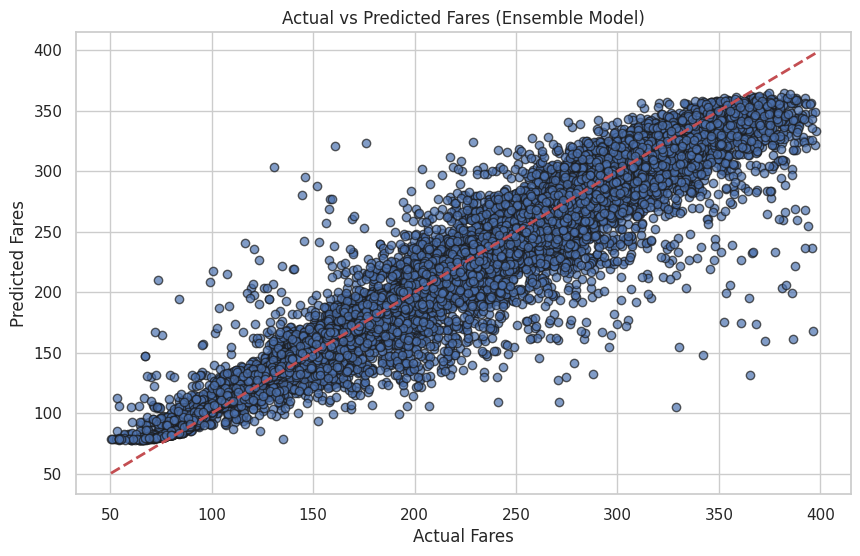

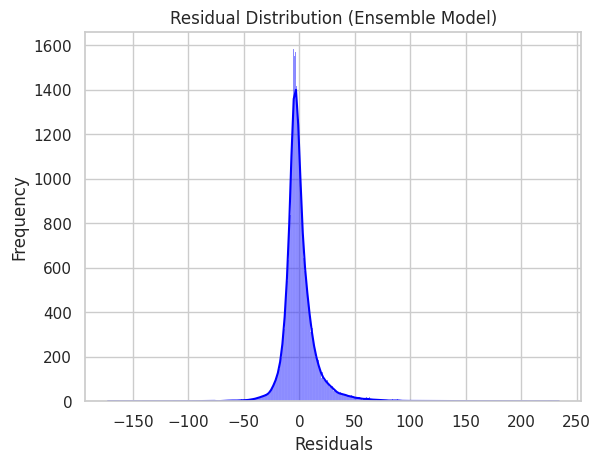

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('cleaned_airline_data.csv')

# Preprocess categorical features
categorical_columns = ['city1', 'city2', 'airport_1', 'airport_2', 'carrier_lg', 'carrier_low', 'Geocoded_City1', 'Geocoded_City2']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Define Features and Target Variable
X = data.drop(columns=['fare'])
y = data['fare']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use a subset of data for faster training
X_train_sampled = X_train.sample(frac=0.3, random_state=42)
y_train_sampled = y_train.loc[X_train_sampled.index]

# --- Model 1: XGBoost ---
xgboost_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    learning_rate=0.1,
    max_depth=3,
    n_estimators=50,
    n_jobs=-1,
    verbosity=1,  # Verbose output to monitor progress
    random_state=42
)
xgboost_model.fit(X_train_sampled, y_train_sampled)

# --- Model 2: Random Forest ---
random_forest_model = RandomForestRegressor(
    n_estimators=50,
    max_depth=5,
    n_jobs=-1,  # Use all CPU cores
    random_state=42
)
random_forest_model.fit(X_train_sampled, y_train_sampled)

# --- Ensemble Model ---
ensemble_model = VotingRegressor(
    estimators=[
        ('xgboost', xgboost_model),
        ('random_forest', random_forest_model),
    ]
)
ensemble_model.fit(X_train_sampled, y_train_sampled)

# Predictions and Evaluation
y_train_pred = ensemble_model.predict(X_train)
y_test_pred = ensemble_model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
print(f"Train R²: {train_r2}, Test R²: {test_r2}")

# --- Visualization ---
# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Actual vs Predicted Fares (Ensemble Model)')
plt.xlabel('Actual Fares')
plt.ylabel('Predicted Fares')
plt.grid(True)
plt.show()

# Residual Analysis
residuals = y_test - y_test_pred
sns.histplot(residuals, kde=True, color='blue')
plt.title('Residual Distribution (Ensemble Model)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
